In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [19]:
def convolution(image, kernel):
    # Phân tích thành phần màu của ảnh
    height, width = image.shape

    # Phân tích thành phần màu của kernel
    kernel_height, kernel_width = kernel.shape

    # Khởi tạo ma trận đầu ra
    output = np.zeros_like(image)

    # Đảo ngược kernel
    kernel = np.flipud(np.fliplr(kernel))

    # Áp dụng bộ lọc
    for y in range(height - kernel_height + 1):
        for x in range(width - kernel_width + 1):
            output[y, x] = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output

In [23]:
def sobel_edge_detection(image):
    # Sobel kernels
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Convolve image with Sobel kernels
    gradient_x = convolution(image, kernel_x)
    gradient_y = convolution(image, kernel_y)

    # # Absolute
    # abs_fx = np.abs(gradient_x)
    # abs_fy = np.abs(gradient_y)
    
    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    # gradient_magnitude = np.array(abs_fx + abs_fy, dtype=np.uint8)

    return gradient_magnitude

In [24]:
# Đọc ảnh
image = plt.imread("D:\Programming\Computer Vision\Projects\Images\Lenna.png")

# Chuyển đổi ảnh sang ảnh grayscale
# gray_image = np.mean(image, axis=2)
# gray_image
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image

array([[0.56297255, 0.56297255, 0.5710118 , ..., 0.5865647 , 0.5270353 ,
        0.4228353 ],
       [0.56297255, 0.56297255, 0.5710118 , ..., 0.5865647 , 0.5270353 ,
        0.4228353 ],
       [0.56297255, 0.56297255, 0.5710118 , ..., 0.5865647 , 0.5270353 ,
        0.4228353 ],
       ...,
       [0.14934118, 0.14934118, 0.1712902 , ..., 0.34387845, 0.3225412 ,
        0.31448236],
       [0.15413725, 0.15413725, 0.18927844, ..., 0.33379218, 0.33933336,
        0.34802747],
       [0.15413725, 0.15413725, 0.18927844, ..., 0.33379218, 0.33933336,
        0.34802747]], dtype=float32)

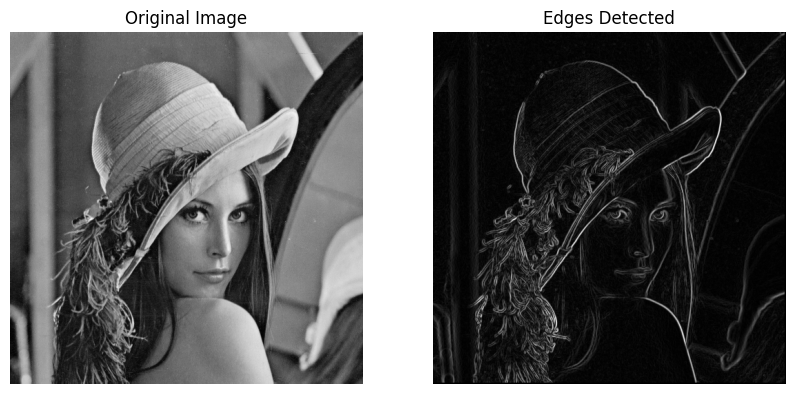

In [25]:
# Thực hiện edge detection
edges = sobel_edge_detection(gray_image)

# Hiển thị ảnh gốc và ảnh sau edge detection
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected')
plt.axis('off')

plt.show()
